# Algorithm

In [2]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

## Audio Data

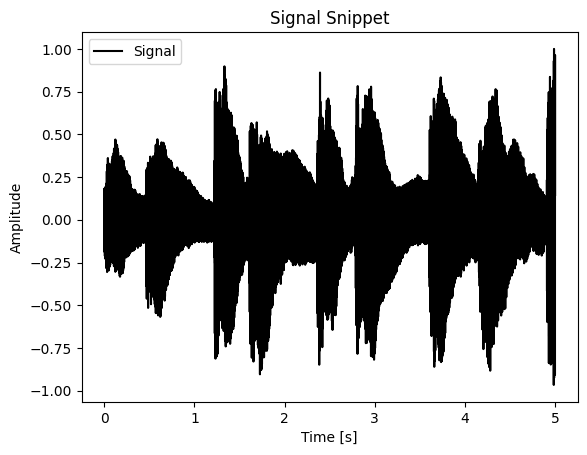

In [5]:
# Opening file,
sample_rate, signal_data = scipy.io.wavfile.read("Chopin_op38_p01.wav")
time = np.linspace(0., signal_data.shape[0]/sample_rate, signal_data.shape[0])

# Reading data snippet,
snippet_time, i = 5, 1
time, signal_data = time[(i - 1)*snippet_time*sample_rate:i*snippet_time*sample_rate], signal_data[(i - 1)*snippet_time*sample_rate:i*snippet_time*sample_rate]

# Averaging channels into one,
signal_data = signal_data.mean(axis = 1)

# Normalising,
signal_data = signal_data/np.max(signal_data)

# Plotting signal,
plt.plot(time, signal_data, label = "Signal", color = "black")
plt.title("Signal Snippet")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(loc = "upper left")
plt.show()

## Signal STFT

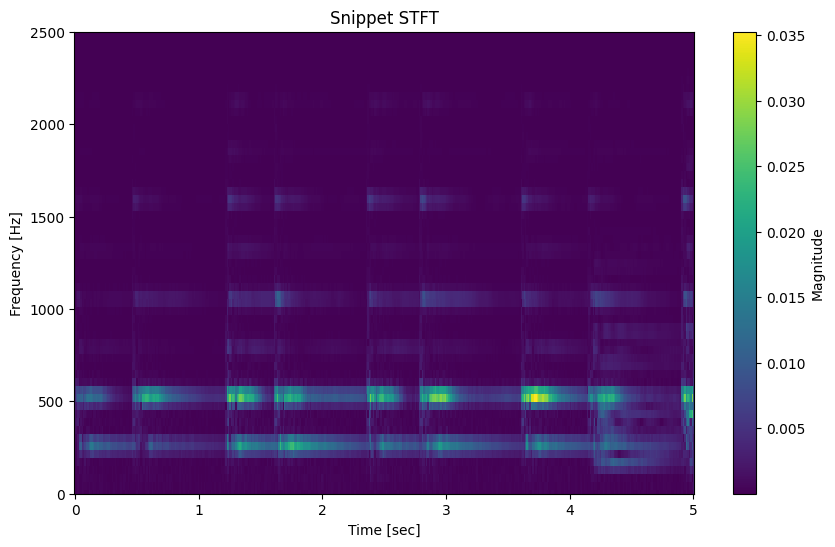

In [10]:
# Calculate the STFT of the signal
frequencies, times, Zxx = scipy.signal.stft(signal_data, fs = sample_rate, nperseg = 1024, scaling = "psd")

# Plot the STFT magnitude
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx))
plt.title("Snippet STFT")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.colorbar(label="Magnitude")
plt.ylim(0, 2500)
plt.show()

## Note Segmentation

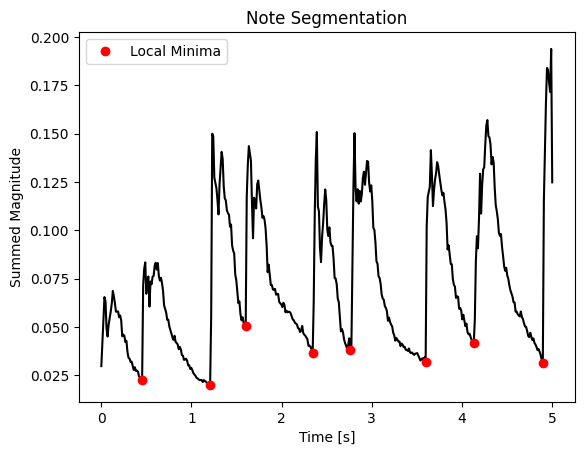

In [30]:
# Calculating the mean magnitude for each time step,
means = []
for row in np.abs(Zxx).T:
    means.append(np.sum(row))
means = np.array(means)

# Finding local minima,
means_inverted = -1*means
minima_indices, _ = scipy.signal.find_peaks(means_inverted, prominence = 0.04)  # Adjust prominence if needed
minima_values = means[minima_indices]

# Segmenting audio into individual notes,
start_times = times[minima_indices]
note_durations = np.diff(start_times)

# Plotting, 
plt.plot(times, means, color = "black")
plt.plot(times[minima_indices], minima_values, 'ro', label='Local Minima')

plt.title("Note Segmentation")
plt.xlabel("Time [s]")
plt.ylabel("Summed Magnitude")
plt.legend(loc = "upper left")
plt.show()

### View Note STFT

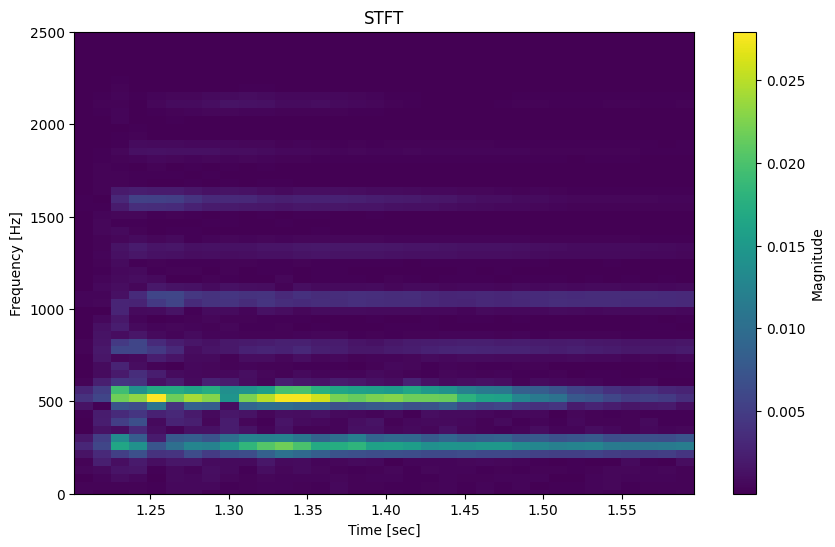

In [31]:
# Plot the STFT magnitude
i = 1
start_index, end_index = minima_indices[i], minima_indices[i+1]
plt.figure(figsize=(10, 6))
plt.pcolormesh(times[start_index:end_index], frequencies, np.abs(Zxx)[:, start_index:end_index])
plt.title("STFT")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.colorbar(label="Magnitude")
plt.ylim(0, 2500)
plt.show()